# CS513: Theory & Practice of Data Cleaning
## Final Project Phase-2
Angie Meeks: ameek4@illinois.edu

Matthew Endo: endo1@illinois.edu

Henry Moss: htmoss2@illinois.edu


This project will use Los Angeles AirBnb Listings from  http://insideairbnb.com/get-the-data.html

This data has already been cleansed and aggregated by Airbnb, but further data cleaning can still be performed. 

Additionally, we will be using data from http://maps.latimes.com/neighborhoods/neighborhood/list/   to better group the Airbnb listings by Neighborhood.

The original Airbnb files do have a reference to neighbrourhood cleansed but think that the neighborhoods listing in the latimes website is a better fit.  

In [1]:
# @begin LA_AirBnB
# @in listings.csv 
# @in regions.csv

import csv
import re
import requests
page = requests.get("http://maps.latimes.com/neighborhoods/neighborhood/list/")
# Import modules used in this tutorial
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pathlib import Path


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

-- if runnning for the first time use %load_ext sql

In [3]:
%reload_ext sql

In [4]:
# Remove existing .db files to avoid errors
if os.path.exists('los_angeles_airbnb.db') == True:
    os.remove('los_angeles_airbnb.db')



In [5]:

# file names
db_name = 'los_angeles_airbnb.db'
listings_name = 'listings_airbnb_los_angeles.csv'
regions_name = 'regions.csv'



In [6]:
# Load data and view the first ten rows using pandas
df = pd.read_csv(listings_name)
df[0:10]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20210705235432,2021-07-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210705235432,2021-07-06,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,4.97,5.00,4.83,NaN,t,2,0,2,0,0.70
2,2732,https://www.airbnb.com/rooms/2732,20210705235432,2021-07-06,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.70,4.90,4.40,228269,f,2,1,1,0,0.39
3,2864,https://www.airbnb.com/rooms/2864,20210705235432,2021-07-06,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,3021,https://www.airbnb.com/rooms/3021,20210705235432,2021-07-07,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,https://www.airbnb.com/users/show/3415,...,4.30,4.64,4.00,NaN,f,4,1,3,0,0.42
5,5728,https://www.airbnb.com/rooms/5728,20210705235432,2021-07-06,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/7a29d275-f293...,9171,https://www.airbnb.com/users/show/9171,...,4.92,4.79,4.70,NaN,f,4,1,3,0,4.54
6,5729,https://www.airbnb.com/rooms/5729,20210705235432,2021-07-06,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,https://www.airbnb.com/users/show/9171,...,4.89,4.76,4.71,NaN,f,4,1,3,0,4.95
7,5843,https://www.airbnb.com/rooms/5843,20210705235432,2021-07-06,Artist Oasis near Venice Beach w/ Beautiful Ga...,Do you want a taste of Paradise?<br />Our one-...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/25d657aa-2529...,9171,https://www.airbnb.com/users/show/9171,...,4.92,4.75,4.53,HSR19-002149,f,4,1,3,0,1.04
8,6931,https://www.airbnb.com/rooms/6931,20210705235432,2021-07-06,Run Runyon | Beau Furn Rm Dres Rm/Walk-In Clst...,Runyon Canyon.<br /><br />Gym & Sauna Now Open...,We are in the middle of one of the great citie...,https://a0.muscache.com/pictures/37075299/eb4b...,3008,https://www.airbnb.com/users/show/3008,...,4.88,4.79,4.71,NaN,t,2,0,2,0,1.22
9,7992,https://www.airbnb.com/rooms/7992,20210705235432,2021-07-07,"Quiet,Walkable Area/Sanitized/CozySpot",This is not a party house. No smoking of any ...,Atwater Village has a variety of great shops a...,https://a0.muscache.com/pictures/8b955c3f-9f7c...,22363,https://www.airbnb.com/users/show/22363,...,4.98,4.94,4.89,HSR19-003514,f,2,2,0,0,4.14


Create the database and the tables
Load data into a pandas dataframe and then populate Sqlite tables


In [7]:
# @begin create_database @desc create SQL database for LA AirBnB data
# Create database connection and cursor
con_1 = sqlite3.connect(db_name)
cur_1 = con_1.cursor()

In [8]:
# @in listings.csv 
# Create database table from pandas DataFrame object created earlier
df.to_sql('listings', con_1)

In [9]:
# Save and close database connection
con_1.commit()
con_1.close()

In [10]:
# Create database connection
%reload_ext sql
#%load_ext lib.sqlite.sqlite_evaluate_magic
con_2 = 'sqlite:///' + os.path.expanduser(db_name)
%sql $con_2

In [11]:
%%sql
select count(*) from listings;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
31596


This count matches the csv file

In [12]:
# @in regions.csv


In [14]:
%%sql
CREATE TABLE  IF NOT EXISTS  regions (City, Region);

 * sqlite:///los_angeles_airbnb.db
Done.


[]

In [16]:

regions = pd.read_csv(regions_name, header=0)
regions.to_sql('regions', con_2, if_exists='append', index = False)


In [17]:
%%sql
select count() from regions;

 * sqlite:///los_angeles_airbnb.db
Done.


count()
272


This count matches the LA.csv file

In [18]:
# @out LA_airbnb.db(listings_table)
# @out LA_airbnb.db(regions_table)
# @end create_database

# Examine neighbourhoods and regions data 

In [19]:
# @begin identify_null_neighbourhoods @desc identify listings with null in neighbourhood column 
# @in LA_airbnb.db(listings_table)

In [20]:
%%sql
select count(*) from listings where neighbourhood is null;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
12134


In [21]:
%%sql
select count(*) from listings where neighbourhood_cleansed is null;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
0


In [22]:
%%sql
select neighbourhood, neighbourhood_cleansed from listings limit 20;

 * sqlite:///los_angeles_airbnb.db
Done.


neighbourhood,neighbourhood_cleansed
None,Culver City
"Los Angeles, California, United States",Hollywood
"Santa Monica, California, United States",Santa Monica
"Bellflower, California, United States",Bellflower
"Los Angeles, California, United States",Hollywood Hills West
"Los Angeles, California, United States",Del Rey
"Los Angeles, California, United States",Del Rey
"Los Angeles, California, United States",Del Rey
"Los Angeles, California, United States",Hollywood
"Los Angeles, California, United States",Atwater Village


In [24]:
%%sql
select * from regions limit 3;

 * sqlite:///los_angeles_airbnb.db
Done.


City,Region
Acton,Antelope Valley
Adams-Normandie,South L.A.
Agoura Hills,Santa Monica Mountains


In [25]:
# @out LA_airbnb.db(listings_table)
# @end identify_null_neighbourhoods

# We will join listings.neighbourhood_cleansed to region.city


In [26]:
# @begin identify_listing_neighbourhoods_not_in_regions @desc identify the listings that have neighbourhoods that have no corresponding entry in regions table
# @in LA_airbnb.db(listings_table)
# @in LA_airbnb.db(regions_table)

In [27]:
%%sql
SELECT COUNT(*) FROM (SELECT * FROM listings
LEFT JOIN regions on listings.neighbourhood_cleansed = regions.City
WHERE Region is NULL);


 * sqlite:///los_angeles_airbnb.db
Done.


COUNT(*)
35


In [28]:
%%sql
SELECT distinct listings.neighbourhood_cleansed, regions.city FROM listings
LEFT JOIN regions on listings.neighbourhood_cleansed = regions.City
WHERE Region is NULL LIMIT 0, 49999;

 * sqlite:///los_angeles_airbnb.db
Done.


neighbourhood_cleansed,City
La Canada Flintridge,None
East Whittier,None


In [29]:
%%sql
select city from regions where city like '%Flintridge';

 * sqlite:///los_angeles_airbnb.db
Done.


City
La Cañada Flintridge


We found two neighbourhoods not in the regions table: East Whittier and La Canada Flintridge. In 2012, East Whittier was changed from East La Mirada (which is in the regions table). La Canada Flintridge was not joined due to spelling differences in the neighbourhoods and regions table (one N had a tilde and other did not). 



We added East Whittier in the regions table with the region of "Southeast". changed the spelling of the La Canada Flintridge in the regions table to not have a tilde to match the spelling in the neighbourhoods table 


In [30]:
# @in insert_east_whittier_in_regions

In [31]:
%%sql
INSERT into regions values ('East Whittier','Southeast');


 * sqlite:///los_angeles_airbnb.db
1 rows affected.


[]

In [33]:
# @in change_flintridge_spelling_in_regions

In [34]:
%%sql
update regions set city = 'La Canada Flintridge' where city like '%ada% Flint%';

 * sqlite:///los_angeles_airbnb.db
1 rows affected.


[]

In [35]:
%%sql
SELECT COUNT(*) FROM (SELECT * FROM listings
LEFT JOIN regions on listings.neighbourhood_cleansed = regions.City
WHERE Region is NULL);

 * sqlite:///los_angeles_airbnb.db
Done.


COUNT(*)
0


In [36]:
%%sql
select * from regions where city like '%ada% Flint%';

 * sqlite:///los_angeles_airbnb.db
Done.


City,Region
La Canada Flintridge,Verdugos


In [37]:
# @out LA_airbnb.db(regions_table)_1
# @end identify_listing_neighbourhoods_not_in_regions


# Convert price to numeric

In [50]:
# @begin convert_dollars_to_int @desc convert the dollar amounts in price to ints
# @in LA_airbnb.db(listings_table)

In [51]:
%%sql
select count(*) from listings where price is null;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
0


In [52]:
%%sql
alter table listings add column price_num number;

 * sqlite:///los_angeles_airbnb.db
(sqlite3.OperationalError) duplicate column name: price_num
[SQL: alter table listings add column price_num number;]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [53]:
%%sql
select  cast(replace(replace(price,'$',''), ',','') as number) from listings limit 3;

 * sqlite:///los_angeles_airbnb.db
Done.


"cast(replace(replace(price,'$',''), ',','') as number)"
115
74
165


In [54]:
%%sql 
update listings set price_num = cast(replace(replace(price,'$',''), ',','') as number) ;

 * sqlite:///los_angeles_airbnb.db
31596 rows affected.


[]

In [55]:
%%sql
select price, price_num from listings limit 10;

 * sqlite:///los_angeles_airbnb.db
Done.


price,price_num
$115.00,115
$74.00,74
$165.00,165
$50.00,50
$118.00,118
$44.00,44
$71.00,71
$130.00,130
$86.00,86
$122.00,122


In [ ]:
# @out LA_airbnb.db(listings_table)_1
# @end convert_dollars_to_int

# @begin remove_0_price_listings @desc remove listings with 0 as the price
# @in LA_airbnb.db(listings_table)_1

In [56]:
%%sql
select min(price_num), max(price_num) from listings;

 * sqlite:///los_angeles_airbnb.db
Done.


min(price_num),max(price_num)
0,25000


Some Airbnb's have a price of 0

In [57]:
%%sql
select count(*) from listings where price_num = 0;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
16


In [58]:
%%sql
select price, neighbourhood_cleansed, room_type, property_type from listings where price_num =0  limit 5

 * sqlite:///los_angeles_airbnb.db
Done.


price,neighbourhood_cleansed,room_type,property_type
$0.00,Hollywood,Hotel room,Room in boutique hotel
$0.00,Koreatown,Hotel room,Room in hotel
$0.00,Venice,Hotel room,Room in boutique hotel
$0.00,Studio City,Hotel room,Room in hotel
$0.00,Studio City,Hotel room,Room in hotel


Looking at higher priced Airbnb

In [59]:
%%sql
select price, neighbourhood_cleansed, room_type, property_type from listings order by price_num desc limit 5

 * sqlite:///los_angeles_airbnb.db
Done.


price,neighbourhood_cleansed,room_type,property_type
"$25,000.00",Beverly Hills,Private room,Room in boutique hotel
"$25,000.00",Beverly Hills,Private room,Room in boutique hotel
"$25,000.00",Beverly Hills,Private room,Room in boutique hotel
"$25,000.00",Beverly Hills,Private room,Room in boutique hotel
"$25,000.00",Beverly Hills,Private room,Room in boutique hotel


More analysis on price

In [60]:
query = "select price_num from listings;"

df = pd.read_sql(query, con_2)

In [61]:
df.describe()

,price_num
count,31596.000000
mean,260.647740
std,729.602076
min,0.000000
25%,75.000000
50%,123.000000
75%,220.000000
max,25000.000000


In [ ]:
# @out LA_airbnb.db(listings_table)_2
# @end remove_0_price_listings


# @begin remove_outlier_prices @desc remove lower and upper bound prices as they may skew the average
# @in LA_airbnb.db(listings_table)_2

In [62]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [63]:
out_iqr(df,'price_num')

The IQR is 145.0
The lower bound value is -142.5
The upper bound value is 437.5
Total number of outliers are 3165


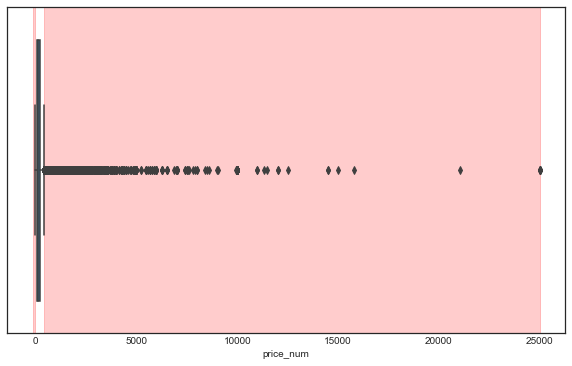

In [64]:
plt.figure(figsize = (10,6))
sns.boxplot(df.price_num)
plt.axvspan(xmin = lower,xmax= df.price_num.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.price_num.max(),alpha=0.2, color='red')

In [ ]:
# @out LA_airbnb.db(listings_table)_3
# @end remove_outlier_prices 


# Check for any missing data in the columns we are interested in  

In [ ]:
# @begin check_missing_data @desc check for missing data in columns of interest
# @in LA_airbnb.db(listings_table)_3

In [65]:
%%sql
select count(*) from listings where room_type is  null;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
0


In [66]:
%%sql
select count(*) from listings where review_scores_value is  null;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
7782


In [67]:
query = "select review_scores_value from listings where review_scores_value is not null;"

df_review_sc= pd.read_sql(query, con_2)

In [68]:
df_review_sc.describe()

,review_scores_value
count,23814.000000
mean,4.678749
std,0.499177
min,0.000000
25%,4.610000
50%,4.810000
75%,4.960000
max,5.000000


In [69]:
%%sql
select count(*) from listings where review_scores_value =0;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
6


We will assume a review score of 0 is valid

In [71]:
%%sql
select count(), room_type from listings group by room_type;

 * sqlite:///los_angeles_airbnb.db
Done.


count(),room_type
21180,Entire home/apt
113,Hotel room
9296,Private room
1007,Shared room


What effect do the review_scores null values and $0 price have on data?

In [73]:
%%sql
select avg(review_scores_value) from listings where review_scores_value is not null;

 * sqlite:///los_angeles_airbnb.db
Done.


avg(review_scores_value)
4.678749055177664


In [74]:
%%sql
select avg(review_scores_value) from listings

 * sqlite:///los_angeles_airbnb.db
Done.


avg(review_scores_value)
4.678749055177664


In [75]:
%%sql
select avg(price_num) from listings where review_scores_value is not null;

 * sqlite:///los_angeles_airbnb.db
Done.


avg(price_num)
211.49210548416897


In [46]:
%%sql
select avg(price_num) from listings;

 * sqlite:///los_angeles_airbnb.db
Done.


avg(price_num)
260.64774022028104


In [ ]:
# @out LA_airbnb.db(listings_table)_3
# @end check_missing_data @desc check for missing data in columns of interest

# The average price is slightly different when taking the average from the table that includes the null values for the review score.
We will create a new table and exclude the fields where review_scores_value is null. 
Additionally, this will impact the analysis of the average price.  The records that did have an average price but a null 
review_scores_value will no longer be included in the new table. 

In [ ]:
# @begin create_listings_new @desc create listings_new where listings with null review scores are removed
# @in LA_airbnb.db(listings_table)_3

In [76]:
%%sql
create table listings_new as select * from listings where review_scores_value is not null;

 * sqlite:///los_angeles_airbnb.db
Done.


[]

In [ ]:
# @out LA_airbnb.db(listings_new_table)
# @end create_listings_new @desc create listings_new where listings with null review scores are removed

# @begin check_listings_and_listings_new_and_regions_tables @desc check counts and distinct values for both tables and examine differences between listings and listings_new
# @in LA_airbnb.db(listings_table)_3
# @in LA_airbnb.db(regions_table)_1
# @in LA_airbnb.db(listings_new_table)

In [77]:
%%sql
select count(*) count_listings from listings

 * sqlite:///los_angeles_airbnb.db
Done.


count_listings
31596


In [78]:
%%sql
select count(*) count_listings from listings_new

 * sqlite:///los_angeles_airbnb.db
Done.


count_listings
23814


In [79]:
query = "select review_scores_value from listings_new"

df_review_sc= pd.read_sql(query, con_2)

In [80]:
df_review_sc.describe()

,review_scores_value
count,23814.000000
mean,4.678749
std,0.499177
min,0.000000
25%,4.610000
50%,4.810000
75%,4.960000
max,5.000000


In [81]:
%%sql
select count(*) from listings_new where review_scores_value =0;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
6


We will assume a review score of 0 is valid 

In [82]:
%%sql
select count(), room_type from listings_new group by room_type;

 * sqlite:///los_angeles_airbnb.db
Done.


count(),room_type
16299,Entire home/apt
104,Hotel room
6862,Private room
549,Shared room


In [ ]:
# @out LA_airbnb.db(listings_table)_3
# @out LA_airbnb.db(regions_table)_1
# @out LA_airbnb.db(listings_new_table)
# @end check_listings_and_listings_new_and_regions_tables


# The average price is slightly different when removing the records with $0 average price

In [ ]:
# @begin remove_outliers_from_listings_new @desc remove outliers from listings_new
# @in LA_airbnb.db(listings_new_table)

In [83]:
%%sql
select avg(price_num) from listings_new;


 * sqlite:///los_angeles_airbnb.db
Done.


avg(price_num)
211.49210548416897


In [84]:
%%sql
select avg(price_num) from listings_new where price_num <> 0;

 * sqlite:///los_angeles_airbnb.db
Done.


avg(price_num)
211.5987311990589


In [85]:
%%sql
select avg(review_scores_value) from listings_new;

 * sqlite:///los_angeles_airbnb.db
Done.


avg(review_scores_value)
4.678749055177664


In [86]:
%%sql
select avg(review_scores_value) from listings_new where price_num <> 0;

 * sqlite:///los_angeles_airbnb.db
Done.


avg(review_scores_value)
4.679029073187165


In [87]:
%%sql
delete from listings_new where price_num = 0;

 * sqlite:///los_angeles_airbnb.db
12 rows affected.


[]

Note that previoulsy there were 16 records where price_num = 0, however we have already removed some records
where review_scores_value = 0.  

In [88]:
%%sql 
select count(*) from listings where price_num =0 and review_scores_value is null;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
4


In [89]:
query = "select price_num from listings_new;"

df = pd.read_sql(query, con_2)

In [90]:
df.describe()

,price_num
count,23802.000000
mean,211.598731
std,397.343996
min,10.000000
25%,75.000000
50%,120.000000
75%,203.000000
max,10000.000000


In [91]:
%%sql
select price, price_num, review_scores_value from listings where price_num = 25000;

 * sqlite:///los_angeles_airbnb.db
Done.


price,price_num,review_scores_value
"$25,000.00",25000,None
"$25,000.00",25000,None
"$25,000.00",25000,None
"$25,000.00",25000,None
"$25,000.00",25000,None
"$25,000.00",25000,None


In [92]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [93]:
out_iqr(df,'price_num')

The IQR is 128.0
The lower bound value is -117.0
The upper bound value is 395.0
Total number of outliers are 2433


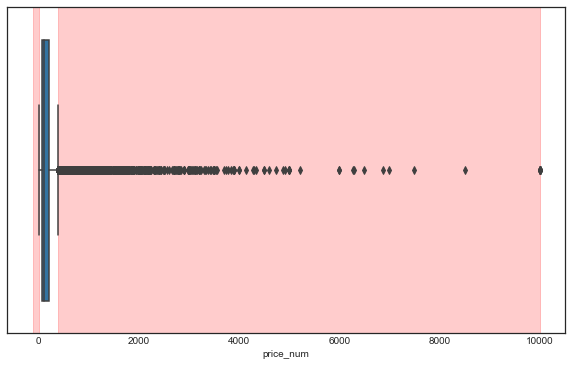

In [94]:
plt.figure(figsize = (10,6))
sns.boxplot(df.price_num)
plt.axvspan(xmin = lower,xmax= df.price_num.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.price_num.max(),alpha=0.2, color='red')

In [ ]:
# @out LA_airbnb.db(listings_new_table)_1
# @end remove_outliers_from_listings_new 


# Other analsyis 

In [ ]:
# @begin check_all_tables @desc check listings, listings_new, and regions tables
# @in LA_airbnb.db(listings_new_table)_1
# @in LA_airbnb.db(listings_table)_3
# @in LA_airbnb.db(regions_table)_1

In [95]:
%%sql
select count() from (select distinct region from regions);

 * sqlite:///los_angeles_airbnb.db
Done.


count()
16


In [96]:
%%sql
select distinct region from regions order by 1;

 * sqlite:///los_angeles_airbnb.db
Done.


Region
Angeles Forest
Antelope Valley
Central L.A.
Eastside
Harbor
Northeast L.A.
Northwest County
Pomona Valley
San Fernando Valley
San Gabriel Valley


In [97]:
%%sql
select count(*) from (select distinct neighbourhood_cleansed from listings_new);

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
261


In [98]:
%%sql
select count(), neighbourhood_cleansed from listings_new group by neighbourhood_cleansed;

 * sqlite:///los_angeles_airbnb.db
Done.


count(),neighbourhood_cleansed
4,Acton
24,Adams-Normandie
35,Agoura Hills
15,Agua Dulce
269,Alhambra
13,Alondra Park
183,Altadena
5,Angeles Crest
125,Arcadia
6,Arleta


# Final Counts after data cleansing

One additional row was added to the regions table


In [99]:
%%sql
select count(*) from regions;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
273


In [100]:
%%sql
select count(*) from listings_new;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
23802


In [101]:
%%sql
select count(*) from listings;

 * sqlite:///los_angeles_airbnb.db
Done.


count(*)
31596


In [ ]:
# @out LA_airbnb.db_cleaned
# @end check_all_tables

# Further analysis

# The target use case (U1) is to summarize the average price and average rating of Los Angeles Airbnb’s by type of room per neighborhood.

# We would like to know which neighborhood has the least expensive and most expensive types of Airbnb’s by room type. 

# We would also like to calculate which neighborhood has the highest and lowest average ratings and how this corresponds with the average price

Los Angeles Airbnb's sorted by average price.  Grouped by room type and region

In [ ]:
# @begin SQL_query
# @in LA_airbnb.db_cleaned

# @out average_price_based_on_region_and_room_type
# @out average_rating_based_on_region_and_room_type

In [73]:
%%sql
SELECT  round(avg(price_num),2) as avg_price, round(avg(review_scores_value),2) as avg_review_score, room_type ,region FROM listings_new
LEFT JOIN regions on listings_new.neighbourhood_cleansed = regions.City  where review_scores_value is not null and price_num > 0
group by room_type ,regions.region order by 1  desc
;

 * sqlite:///los_angeles_airbnb.db
Done.


avg_price,avg_review_score,room_type,Region
9999.0,3.75,Hotel room,San Fernando Valley
840.76,4.76,Entire home/apt,Santa Monica Mountains
281.02,4.64,Entire home/apt,Westside
261.89,4.73,Entire home/apt,South Bay
257.38,4.73,Entire home/apt,San Fernando Valley
250.29,4.64,Entire home/apt,Central L.A.
237.01,4.79,Entire home/apt,Northwest County
232.87,4.66,Entire home/apt,Harbor
207.69,4.61,Entire home/apt,Southeast
205.88,4.74,Entire home/apt,Verdugos


Los Angeles Airbnb's sorted by average review score.  Grouped by property type and region

In [74]:
%%sql
SELECT  round(avg(price_num),2) as avg_price, round(avg(review_scores_value),2) as avg_review_score, room_type ,region
FROM listings_new
LEFT JOIN regions on listings_new.neighbourhood_cleansed = regions.City  where review_scores_value is not null and price_num > 0
group by room_type ,regions.region order by 2  desc
;

 * sqlite:///los_angeles_airbnb.db
Done.


avg_price,avg_review_score,room_type,Region
30.0,5.0,Shared room,Northeast L.A.
45.0,5.0,Shared room,Northwest County
198.75,4.89,Entire home/apt,Angeles Forest
169.85,4.81,Private room,Santa Monica Mountains
170.61,4.8,Entire home/apt,Northeast L.A.
69.59,4.8,Private room,Northeast L.A.
237.01,4.79,Entire home/apt,Northwest County
90.5,4.78,Private room,San Fernando Valley
840.76,4.76,Entire home/apt,Santa Monica Mountains
36.98,4.76,Shared room,South Bay


Regions with highest and lowest average review scores

In [ ]:
# @out average_price_based_on_region 
# @out average_rating_based_on_region

In [75]:
%%sql
SELECT  round(avg(price_num),2) as avg_price, round(avg(review_scores_value),2) as avg_review_score, region FROM listings_new
LEFT JOIN regions on listings_new.neighbourhood_cleansed = regions.City  where review_scores_value is not null and price_num > 0
group by regions.region order by 2 desc
;

 * sqlite:///los_angeles_airbnb.db
Done.


avg_price,avg_review_score,Region
150.35,4.8,Northeast L.A.
728.44,4.77,Santa Monica Mountains
165.15,4.74,Northwest County
214.26,4.74,San Fernando Valley
186.63,4.74,Verdugos
92.8,4.72,Antelope Valley
197.41,4.72,South Bay
122.08,4.69,San Gabriel Valley
118.5,4.68,Eastside
104.01,4.68,Pomona Valley


Regions with highest and lowest average price

In [76]:
%%sql
SELECT  round(avg(price_num),2) as avg_price, round(avg(review_scores_value),2) as avg_review_score, region FROM listings_new
LEFT JOIN regions on listings_new.neighbourhood_cleansed = regions.City  where review_scores_value is not null and price_num > 0
group by regions.region order by 1  desc   
;

 * sqlite:///los_angeles_airbnb.db
Done.


avg_price,avg_review_score,Region
728.44,4.77,Santa Monica Mountains
244.57,4.65,Westside
214.26,4.74,San Fernando Valley
212.38,4.65,Central L.A.
197.41,4.72,South Bay
189.42,4.66,Harbor
186.63,4.74,Verdugos
165.15,4.74,Northwest County
150.35,4.8,Northeast L.A.
147.82,4.66,Southeast


In [80]:
query = "select * from listings_new"

df_listings= pd.read_sql(query, con_2)

In [81]:
gfg_csv_data = df_listings.to_csv('listings_new.csv', index = True)

In [ ]:
# @end SQL_query

# @out average_price_based_on_region_and_room_type
# @out average_rating_based_on_region_and_room_type
# @out average_price_based_on_region 
# @out average_rating_based_on_region
# @end LA_AirBnB